# Population and GNI Dataset 

**Problem Statement** :

Correlation and Causation:

Investigate if there's a correlation between GNI per capita and population growth for countries.
Determine if countries with higher GNI per capita witness different population growth rates than those with lower GNI per capita.


In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "../data/population.csv"
df_population = pd.read_csv(url)

url = "../data/gni_per_cap_atlas_method_con2021.csv"
df_gni = pd.read_csv(url)
df_gni.head()





,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,751,767,783,800,817,834,852,870,888,907
1,Angola,517.0,519.0,522.0,524.0,525.0,528.0,531.0,533.0,536.0,...,2770,2830,2890,2950,3010,3080,3140,3210,3280,3340
2,Albania,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,9610,9820,10k,10.2k,10.5k,10.7k,10.9k,11.1k,11.4k,11.6k
3,United Arab Emirates,738.0,740.0,743.0,746.0,749.0,751.0,754.0,757.0,760.0,...,47.9k,48.9k,50k,51k,52.1k,53.2k,54.3k,55.5k,56.7k,57.9k
4,Argentina,794.0,797.0,799.0,802.0,805.0,808.0,810.0,813.0,816.0,...,12.8k,13.1k,13.4k,13.6k,13.9k,14.2k,14.5k,14.8k,15.2k,15.5k


In [82]:
df_population#.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,108M,108M,109M,109M,109M,110M,110M,110M,111M,111M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,125M,126M,127M,128M,129M,130M,131M,131M,132M,133M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.35M,1.32M,1.29M,1.26M,1.23M,1.21M,1.18M,1.15M,1.12M,1.1M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62.5k,62.2k,61.9k,61.7k,61.4k,61.2k,60.9k,60.7k,60.5k,60.2k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,13.5M,13.5M,13.6M,13.7M,13.8M,13.8M,13.9M,14M,14M,14.1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Samoa,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.2k,47.2k,...,432k,434k,435k,436k,437k,438k,439k,440k,441k,441k
193,Yemen,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,...,73.2M,73.3M,73.5M,73.6M,73.7M,73.8M,73.9M,74M,74.1M,74.2M
194,South Africa,1.45M,1.45M,1.46M,1.46M,1.47M,1.47M,1.48M,1.49M,1.49M,...,75.6M,75.5M,75.4M,75.3M,75.2M,75.1M,75M,74.8M,74.7M,74.6M
195,Zambia,747k,758k,770k,782k,794k,806k,818k,831k,843k,...,60.3M,60.7M,61.1M,61.5M,61.9M,62.2M,62.6M,62.9M,63.3M,63.6M


In [6]:
df_population.isnull()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
193,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
194,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
most= df_population.isnull().sum()
most

country    0
1800       0
1801       0
1802       0
1803       0
          ..
2096       1
2097       1
2098       1
2099       1
2100       1
Length: 302, dtype: int64

In [29]:
missing_values = df_population.isnull().sum(axis=1)
country_most_missing = missing_values.idxmax()
country_name = df_population.loc[country_most_missing, 'country']
country_name, missing_values[country_most_missing]

('Holy See', 100)

In [79]:
# df_p2.columns.values.tolist()

In [81]:
df_p2 = df_population.copy()
df_p2.set_index('country', inplace= True)
# df_p2 = pd.DataFrame({"country":df_population['country'], "Sum of Null Values": )
# df_p2.loc['Holy See']


# null_counts = df_p2.isna().groupby(df_p2.index).sum().sort_values(by='country', ascending= False)
# print(null_counts.head())
# df_p2

# sns.barplot(df_p2.isnull().sum().tolist(), df_p2.columns.values )
# plt.show()
null_counts_per_row = df_p2.isna().sum(axis=1).sort_values(ascending=False)
print(null_counts_per_row)

country
Holy See             100
Afghanistan            0
Malaysia               0
Namibia                0
Niger                  0
                    ... 
Equatorial Guinea      0
Greece                 0
Grenada                0
Guatemala              0
Zimbabwe               0
Length: 197, dtype: int64


8. Drop unnecessary rows (if needed).

In [85]:
# sns.barplot(df_p2.columns.values, df_p2.isnull().sum().tolist())
# plt.show()
df_p2.drop(labels='Holy See', inplace= True)

In [87]:
# sns.barplot(df_p2.columns.values, df_p2.isnull().sum().tolist())
# plt.show()

In [88]:
df_p2

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,108M,108M,109M,109M,109M,110M,110M,110M,111M,111M
Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,125M,126M,127M,128M,129M,130M,131M,131M,132M,133M
Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,416k,...,1.35M,1.32M,1.29M,1.26M,1.23M,1.21M,1.18M,1.15M,1.12M,1.1M
Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62.5k,62.2k,61.9k,61.7k,61.4k,61.2k,60.9k,60.7k,60.5k,60.2k
United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,13.5M,13.5M,13.6M,13.7M,13.8M,13.8M,13.9M,14M,14M,14.1M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.3k,47.2k,47.2k,47.2k,...,432k,434k,435k,436k,437k,438k,439k,440k,441k,441k
Yemen,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,2.59M,...,73.2M,73.3M,73.5M,73.6M,73.7M,73.8M,73.9M,74M,74.1M,74.2M
South Africa,1.45M,1.45M,1.46M,1.46M,1.47M,1.47M,1.48M,1.49M,1.49M,1.5M,...,75.6M,75.5M,75.4M,75.3M,75.2M,75.1M,75M,74.8M,74.7M,74.6M


In [108]:
def convert_m_k(x) :
    if x[-1] == "M":
        x = x[:-1]
        x = float(x)* (10**6)


    elif x[-1] == "k":
        x = x[:-1]
        x = float(x)* (10**3)       
    elif x[-1] == "B":
        x = x[:-1]
        x = float(x)* (10**9)   
    else : 
        x= float(x)    
    return int(x)


df_check_for_MK = df_p2.applymap(lambda x: convert_m_k(x) )

df_check_for_MK


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,108000000,108000000,109000000,109000000,109000000,110000000,110000000,110000000,111000000,111000000
Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,125000000,126000000,127000000,128000000,129000000,130000000,131000000,131000000,132000000,133000000
Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,416000,...,1350000,1320000,1290000,1260000,1230000,1210000,1180000,1150000,1120000,1100000
Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62500,62200,61900,61700,61400,61200,60900,60700,60500,60200
United Arab Emirates,40200,40200,40200,40200,40200,40200,40200,40200,40200,40200,...,13500000,13500000,13600000,13700000,13800000,13800000,13900000,14000000,14000000,14100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,47300,47300,47300,47300,47300,47300,47300,47200,47200,47200,...,432000,434000,435000,436000,437000,438000,439000,440000,441000,441000
Yemen,2590000,2590000,2590000,2590000,2590000,2590000,2590000,2590000,2590000,2590000,...,73200000,73300000,73500000,73600000,73700000,73800000,73900000,74000000,74100000,74200000
South Africa,1450000,1450000,1460000,1460000,1470000,1470000,1480000,1490000,1490000,1500000,...,75600000,75500000,75400000,75300000,75200000,75100000,75000000,74800000,74700000,74600000


In [95]:
# x='3.28M'
# x = x[:-1]  
# x=float(x)* (10**6) 
# x



3280000.0

In [100]:
# x='2.8k'
# x = x[:-1]
# k =float(x)* (10**3)
# k    

2800.0

5. Display the data types of each feature.

In [116]:
df_check_for_MK.loc[:,:].dtypes


1800    int64
1801    int64
1802    int64
1803    int64
1804    int64
        ...  
2096    int64
2097    int64
2098    int64
2099    int64
2100    int64
Length: 301, dtype: object

In [120]:
sum = df_check_for_MK.sum()
sum

1800      984453629
1801      987894028
1802      991554326
1803      994953126
1804      997484728
           ...     
2096    10381911399
2097    10370037098
2098    10355923898
2099    10353490599
2100    10340875298
Length: 301, dtype: int64

In [122]:
df_check_for_MK_sum_divbyall=(df_check_for_MK/sum).copy()


In [126]:
df_check_for_MK_sum_divbyall_mulof10k=(df_check_for_MK_sum_divbyall*10000).copy()
df_check_for_MK_sum_divbyall_mulof10k


,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.317974,33.201942,33.079378,32.966377,32.882709,32.731345,32.637315,32.486614,32.367952,32.283607,...,103.756205,103.844889,104.816801,104.915371,105.003901,105.953515,106.074837,106.219398,107.210220,107.341010
Angola,15.947932,15.892393,15.833726,15.779638,15.739589,15.667138,15.622130,15.549995,15.493196,15.452824,...,120.088201,121.152370,122.125998,123.203371,124.270672,125.217790,126.325488,126.497646,127.493234,128.615805
Albania,4.063168,4.069262,4.074411,4.070544,4.080263,4.081439,4.089615,4.090540,4.085467,4.094506,...,1.296953,1.269215,1.240492,1.212783,1.184906,1.165489,1.137894,1.110476,1.081761,1.063740
Andorra,0.026918,0.026825,0.026726,0.026634,0.026567,0.026445,0.026369,0.026247,0.026151,0.026083,...,0.060044,0.059807,0.059524,0.059388,0.059149,0.058949,0.058727,0.058614,0.058434,0.058216
United Arab Emirates,0.408348,0.406926,0.405424,0.404039,0.403014,0.401159,0.400006,0.398159,0.396705,0.395671,...,12.969526,12.980611,13.078060,13.186611,13.294072,13.292350,13.404002,13.518832,13.522010,13.635209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,0.480470,0.478796,0.477029,0.475399,0.474193,0.472010,0.470654,0.467490,0.465783,0.464569,...,0.415025,0.417303,0.418306,0.419661,0.420979,0.421888,0.423335,0.424878,0.425943,0.426463
Yemen,26.309010,26.217387,26.120606,26.031377,25.965310,25.845788,25.771539,25.652540,25.558840,25.492238,...,70.323650,70.479911,70.679219,70.841938,70.998051,71.085176,71.263004,71.456686,71.570065,71.754081
South Africa,14.728982,14.677688,14.724357,14.674058,14.737068,14.669231,14.726593,14.757639,14.703734,14.763844,...,72.629344,72.595269,72.506301,72.478233,72.443058,72.337354,72.323753,72.229190,72.149580,72.140895


2225.8034812790706


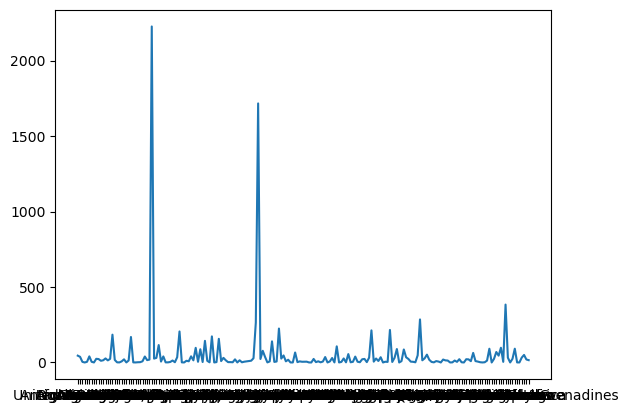

In [131]:
row_means =df_check_for_MK_sum_divbyall_mulof10k.mean(axis=1)
print(max(row_means))

plt.plot(row_means)

In [138]:
def format_words(string):
  if len(string) == 0:
    return ""
#   result=""
#   for i in range(len(string)):
#     if string[i] == " ":
#       continue
#     elif i != len(string)-1:
#       if i != len(string)-2 and i != 0:
#         result += f"{string[i]}"
#       elif i==0:
#         result += f"{string[i]}"
#       else:
#         result += f", {string[i]}"
#     else:
#       result += f" and {string[i]}"
  result = ", ".join(string[1:-1])
  result = f"{string[0]} {result} {string[-1]}"   
  return result

print(format_words(['ninja', 'samurai', 'ronin'])) # should return "ninja, samurai and ronin")
print(format_words(['ninja', ' ', 'ronin'])) # should return "ninja and ronin")
print(format_words([])) # should return ""

ninja samurai ronin
ninja   ronin

